In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Task-1

# 1.Load the dataset into a pandas data frame (train and test).

In [2]:
df=pd.read_csv("DS3_C1_S4_SuperstoreSales_Data_Challenge.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12-05-2016,12-10-2016,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,09-06-2015,09-09-2015,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,25.2480,3,0.20,4.1028


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.shape

(2121, 16)

# 2.Perform data analysis to determine whether the data is ready for time series analysis.if not then prepare the data to preform time series analysis.

In [8]:
df1=pd.read_csv("DS3_C1_S4_SuperstoreSales_Data_Challenge.csv",index_col='Order Date',parse_dates=['Order Date'])

In [14]:
data=df1['Sales']
data

Order Date
2016-11-08     261.9600
2016-11-08     731.9400
2015-10-11     957.5775
2014-06-09      48.8600
2014-06-09    1706.1840
                ...    
2015-03-19     383.4656
2016-12-05      13.4000
2015-09-06      85.9800
2014-01-21      25.2480
2017-02-26      91.9600
Name: Sales, Length: 2121, dtype: float64

In [15]:
resample_data=df1.resample('M').mean()

In [16]:
resample_data=pd.DataFrame(resample_data)
resample_data.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,4433.300000,53017.650000,312.126250,3.500000,0.135000,40.273325
2014-02-28,6353.285714,66296.571429,262.808286,3.285714,0.114286,17.241671
2014-03-31,5835.939394,58027.666667,441.635030,3.969697,0.230303,-34.201667
2014-04-30,4829.115385,65488.730769,305.570654,3.115385,0.132692,21.322312
2014-05-31,4806.750000,57519.791667,288.032792,4.041667,0.256250,-14.578233


# 3.perform visual inspection of the data.

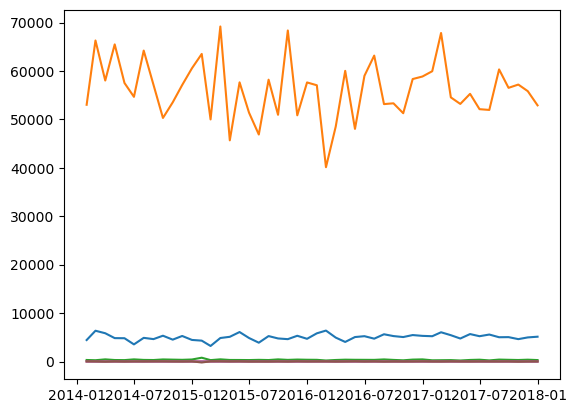

In [17]:
plt.plot(resample_data);

# 4.Accomplish the decomposotion of data.Does it have all the components required for a time series analysis?

In [18]:
decomposition=seasonal_decompose(data,period=365)
d_seasonal=decomposition.seasonal
d_trend=decomposition.trend
d_residual=decomposition.resid

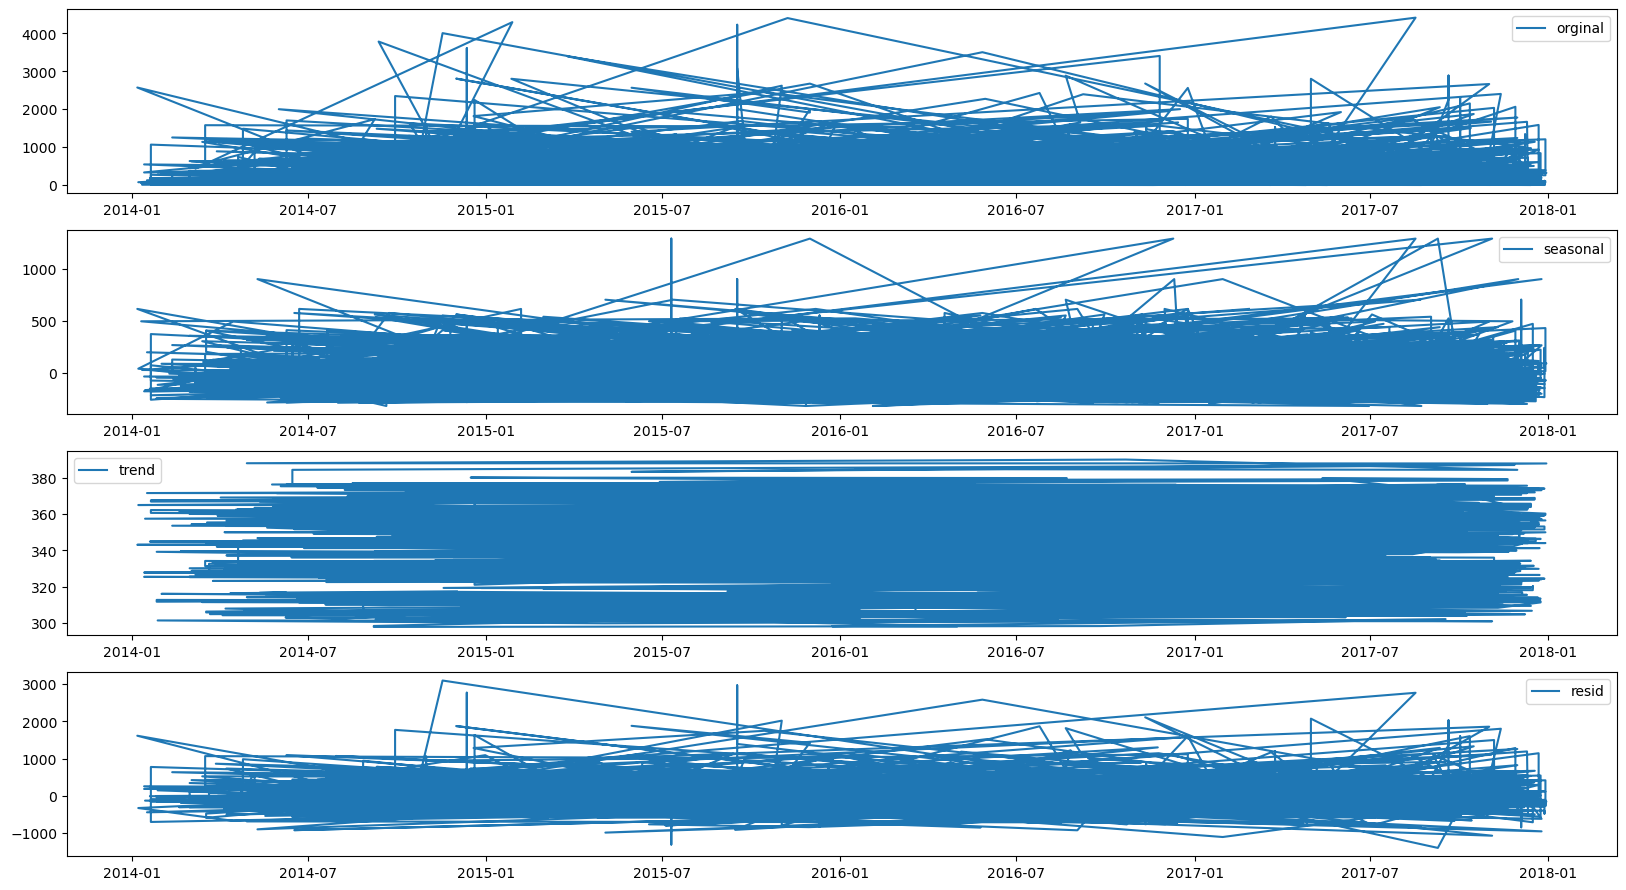

In [20]:
fig,ax=plt.subplots(4,1,figsize=(20,11))

plt.subplot(411)
plt.plot(data,label='orginal')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_trend,label='trend')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='resid')
plt.legend(loc='best')

# Removing outliers on sales data.

In [21]:
a=df1['Sales']
q1=a.quantile(0.25)
q3=a.quantile(0.75)
iqr=q3-q1
lf=q1-1.5*iqr
uf=q3+1.5*iqr
print('q1={}, q3={}, iqr={}, lf={}, uf={}' .format(q1,q3,iqr,lf,uf))

q1=47.04, q3=435.168, iqr=388.128, lf=-535.152, uf=1017.36


In [22]:
outliers=[]
for i in a:
    if i<lf:
        outliers.append(i)
    if i>uf:
        outliers.append(i)
len(outliers)

164

In [23]:
df1['Sales']=df1['Sales'].replace(to_replace=outliers,value=df['Sales'].mean())
df1['Sales']

Order Date
2016-11-08    261.960000
2016-11-08    731.940000
2015-10-11    957.577500
2014-06-09     48.860000
2014-06-09    349.834887
                 ...    
2015-03-19    383.465600
2016-12-05     13.400000
2015-09-06     85.980000
2014-01-21     25.248000
2017-02-26     91.960000
Name: Sales, Length: 2121, dtype: float64

<AxesSubplot:xlabel='Sales'>

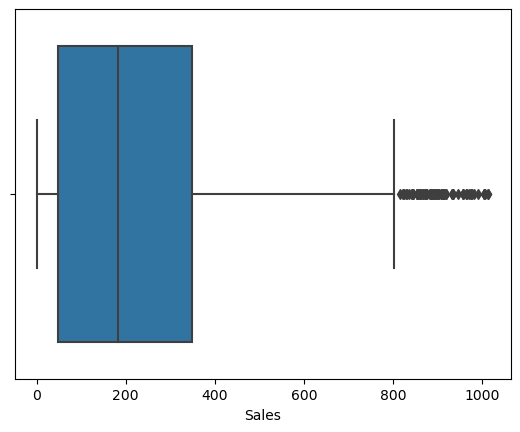

In [24]:
sb.boxplot(df1['Sales'])

# after removing outliers the Time_series components.

In [29]:
resample_data=resample_data['Sales']
resample_data.head()

Order Date
2014-01-31    312.126250
2014-02-28    262.808286
2014-03-31    441.635030
2014-04-30    305.570654
2014-05-31    288.032792
Freq: M, Name: Sales, dtype: float64

In [30]:
decomposition=seasonal_decompose(resample_data,period=12)
d_seasonal=decomposition.seasonal
d_trend=decomposition.trend
d_residual=decomposition.resid

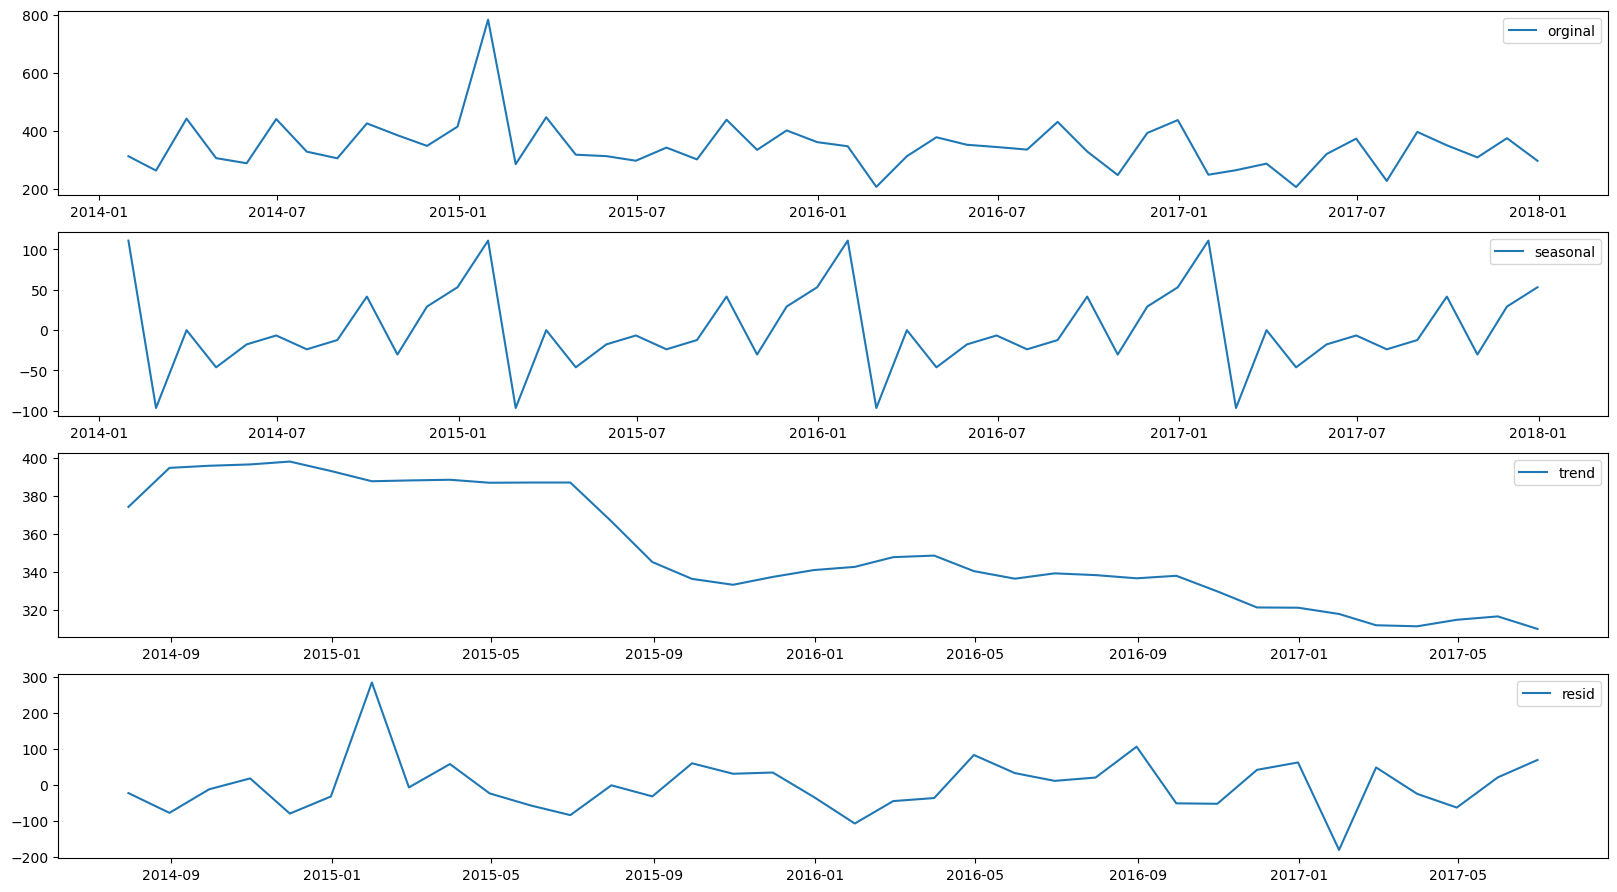

In [31]:
fig,ax=plt.subplots(4,1,figsize=(20,11))

plt.subplot(411)
plt.plot(resample_data,label='orginal')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_trend,label='trend')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='resid')
plt.legend(loc='best')

In the above figure we can see the original series with different time series component. We can trend component in which there is a downward trend. Seasonal component shows the seasonal pattern in the graph. Residual shows the irregular component.

# Task-2

# Check data for stationarity.

In [32]:
def checkstationarity(resample_data):
    pvalue=adfuller(resample_data)[1]
    if pvalue>0.05:
        print('pvalue={}, Data is not stationarity'.format(pvalue))
    else:
        print('pvalue={}, Data is stationarity'.format(pvalue))
    return(print)

In [33]:
checkstationarity(resample_data)

pvalue=9.093398510006446e-10, Data is stationarity


<function print>

# 2.Plot ACF and PACF.

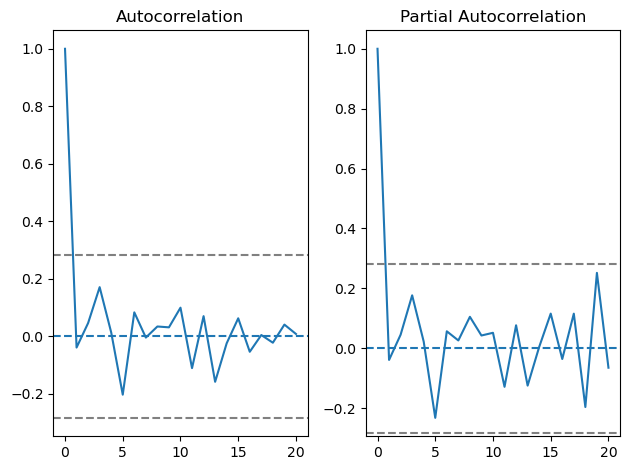

In [35]:
lag_acf=acf(resample_data,nlags=20)
lag_pacf=pacf(resample_data,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(resample_data)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(resample_data)),linestyle='--',color='grey')
plt.title("Autocorrelation")


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(resample_data)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(resample_data)),linestyle='--',color='grey')
plt.title("Partial Autocorrelation")

plt.tight_layout()

The lag values in acf_plot=6 and lag values in pacf_plot=5.

# 3.Adjust the values for p and q get the most accurate model. This is done using cross-validation(Avoid using the auto_arima model at this stage.)

In [36]:
m1=auto_arima(resample_data,start_p=0,max_p=4,start_q=0,max_q=3,seasonal= False,trace= True)
m1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=702.671, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=607.117, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=668.148, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=594.092, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=581.905, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=580.104, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=581.915, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=650.512, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=583.687, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=575.024, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=572.974, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=571.039, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=572.968, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Tota

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                -283.519
Date:                Wed, 13 Sep 2023   AIC                            571.039
Time:                        11:59:25   BIC                            574.781
Sample:                    01-31-2014   HQIC                           572.453
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    346.4787     17.318     20.007      0.000     312.536     380.422
sigma2      7906.4292    901.099      8.774      0.000    6140.308    9672.550
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               229.60
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             2.29
Prob(H) (two-sided):                  0.03   Kurtosis:                        12.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Task-4

# 1.Bulid the ARIMA Model.

In [37]:
p=1;d=2;q=2
m2=ARIMA(resample_data,order=(p,d,q)).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -278.056
Date:                Wed, 13 Sep 2023   AIC                            564.113
Time:                        11:59:36   BIC                            571.427
Sample:                    01-31-2014   HQIC                           566.853
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0401      0.143     -0.280      0.779      -0.321       0.240
ma.L1         -1.9981      0.165    -12.095      0.000      -2.322      -1.674
ma.L2          0.9998      0.179      5.573      0.000       0.648       1.351
sigma2      7931.1781   4.33e-05   1.83e+08      0.000    7931.178    7931.178
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                32.71
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             1.08
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  1e+24. Standard errors may be unstable.
"""

In [38]:
p=2;d=3;q=1
m2=ARIMA(resample_data,order=(p,d,q)).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 3, 1)   Log Likelihood                -288.617
Date:                Wed, 13 Sep 2023   AIC                            585.234
Time:                        11:59:42   BIC                            592.461
Sample:                    01-31-2014   HQIC                           587.928
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0500      0.133     -7.890      0.000      -1.311      -0.789
ar.L2         -0.5770      0.117     -4.913      0.000      -0.807      -0.347
ma.L1         -0.9999     99.247     -0.010      0.992    -195.519     193.520
sigma2      1.901e+04   1.89e+06      0.010      0.992   -3.68e+06    3.71e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.13   Jarque-Bera (JB):                21.00
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.53
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
p=0;d=2;q=1
m2=ARIMA(resample_data,order=(p,d,q)).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -291.284
Date:                Wed, 13 Sep 2023   AIC                            586.569
Time:                        11:59:48   BIC                            590.226
Sample:                    01-31-2014   HQIC                           587.939
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9979      5.932     -0.168      0.866     -12.625      10.629
sigma2       1.71e+04   1.02e+05      0.168      0.866   -1.82e+05    2.16e+05
===================================================================================
Ljung-Box (L1) (Q):                  13.89   Jarque-Bera (JB):                34.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.86
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretion

AIC score of AR(1) model is 564.113

AIC score of AR(2) model is 585.234

AIC score of AR(3) model is 586.569

Lesser the AIC score is better the model. Hence AR(1) is the better model

# 2.Summarize the model.

In [40]:
aa=int(0.7*len(resample_data))
train=resample_data.iloc[:aa]
test=resample_data.iloc[aa:]
print('train={}, test={}'.format(len(train),len(test)))

train=33, test=15


# predict the test data using models.

In [41]:
start=len(train)
end=len(train) + len(test)-1
print('start={}, end={}' .format(start,end))

start=33, end=47


In [42]:
prediction=m2.predict(start,end,typ='levels')
prediction.head()

Order Date
2016-10-31    329.139370
2016-11-30    245.536268
2016-12-31    394.903642
2017-01-31    440.358312
2017-02-28    246.873801
Freq: M, Name: predicted_mean, dtype: float64

# Finding the actual,predict and error values

In [43]:
actual=[];pred=[]
for i in range(len(prediction)):
    actual.append(test[i])
    pred.append(prediction[i])
df_res=pd.DataFrame({'actual':actual, 'predictied':pred})
df_res['error']=df_res.actual-df_res.predictied
df_res.head()

,actual,predictied,error
0,247.345354,329.139370,-81.794016
1,392.390479,245.536268,146.854211
2,436.651369,394.903642,41.747727
3,248.501333,440.358312,-191.856978
4,264.089900,246.873801,17.216099


# Plot the errors.

<AxesSubplot:>

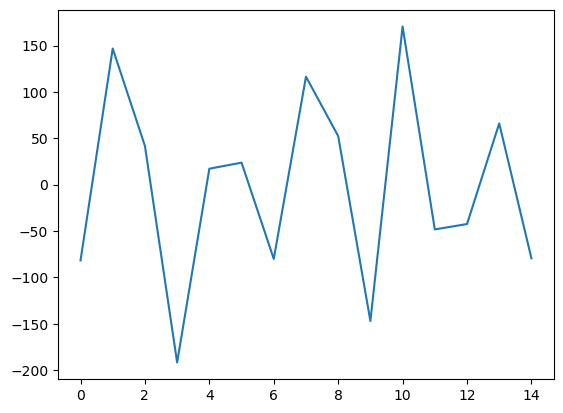

In [44]:
df_res.error.plot()

# Box-Jenkins test to check model's goodness.

In [45]:
pvalue = sm.stats.acorr_ljungbox(m2.resid, lags = [1], return_df=True)["lb_pvalue"].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail to reject H0.Good model")

Reject H0. Bad model


# Calculate error terms.

In [46]:
msg = "ARIMA model. Order =(" + str(p) + "," + str(d) + "," + str(q) + ")"

mse1 = mean_squared_error(df_res.actual, df_res.predictied)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1, np.sqrt(mse1)))


ARIMA model. Order =(0,2,1)
	MSE = 10400.337904279984
	RMSE = 101.98204697043487


# Plot actual vs. predicted values.

Text(0.5, 1.0, 'ARIMA model. Order =(0,2,1)')

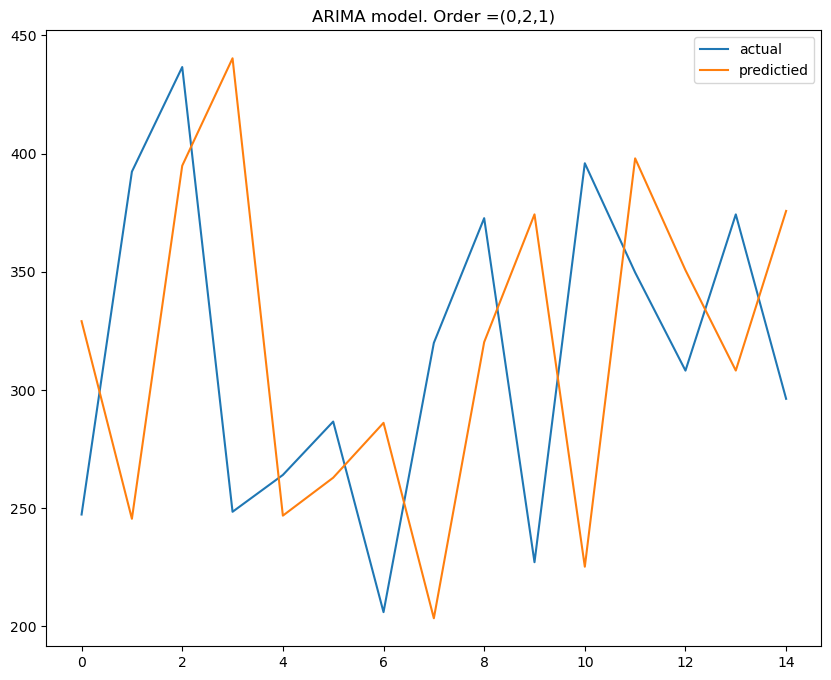

In [47]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predictied.plot(legend=True)
plt.title(msg)

# 3.Forecast using the model.

In [48]:
forecast=m2.predict(start=len(resample_data),end=len(resample_data)+12,typ='levels')
forecast

2018-01-31    296.067748
2018-02-28    295.838639
2018-03-31    295.609531
2018-04-30    295.380422
2018-05-31    295.151314
2018-06-30    294.922205
2018-07-31    294.693097
2018-08-31    294.463988
2018-09-30    294.234879
2018-10-31    294.005771
2018-11-30    293.776662
2018-12-31    293.547554
2019-01-31    293.318445
Freq: M, Name: predicted_mean, dtype: float64

# Visualize the forecast.

Text(0.5, 1.0, 'ARIMA model. Order =(0,2,1)')

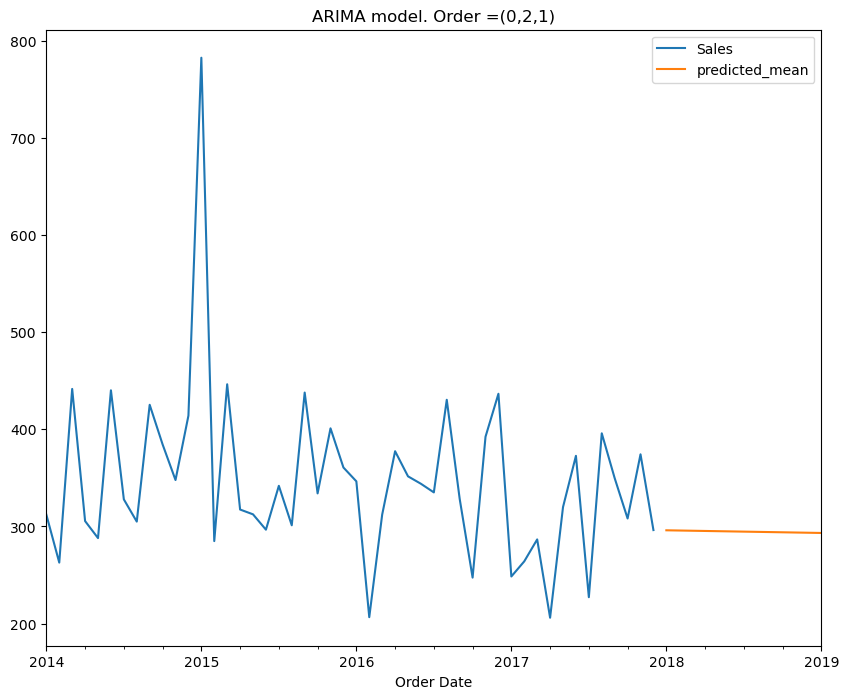

In [49]:
resample_data.plot(figsize=(10,8),legend=True)
forecast.plot(legend=True)
plt.title(msg)

# Task-5

# 1.Bulid the SARIMA Model.

In [50]:
p=1;d=0;q=2
r2=sm.tsa.statespace.SARIMAX(resample_data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -286.354
Date:                            Wed, 13 Sep 2023   AIC                            586.708
Time:                                    12:01:28   BIC                            599.806
Sample:                                01-31-2014   HQIC                           591.658
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001   1168.865      0.000       0.998       1.002
ma.L1         -0.9601      0.203     -4.724      0.000      -1.358      -0.562
ma.L2          0.0234      0.199      0.117      0.907      -0.367       0.414
ar.S.L12      -0.6051      0.783     -0.773      0.439      -2.139       0.929
ma.S.L12       0.8507      0.791      1.076      0.282      -0.700       2.401
ma.S.L24      -0.1476      0.465     -0.318      0.751      -1.058       0.763
sigma2      6882.0208      0.000    6.4e+07      0.000    6882.021    6882.021
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               164.69
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             2.01
Prob(H) (two-sided):                  0.02   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+24. Standard errors may be unstable.
"""

In [51]:
p=2;d=1;q=1
r2=sm.tsa.statespace.SARIMAX(resample_data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -212.683
Date:                            Wed, 13 Sep 2023   AIC                            439.365
Time:                                    12:01:34   BIC                            450.253
Sample:                                01-31-2014   HQIC                           443.123
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1547      0.300     -0.516      0.606      -0.742       0.433
ar.L2         -0.1722      0.265     -0.651      0.515      -0.691       0.347
ma.L1         -0.9998     98.385     -0.010      0.992    -193.830     191.831
ar.S.L12      -0.9632      1.014     -0.950      0.342      -2.951       1.025
ar.S.L24      -0.9201      0.479     -1.923      0.055      -1.858       0.018
ma.S.L12       0.7336     17.185      0.043      0.966     -32.948      34.415
sigma2      2478.3561   2.42e+05      0.010      0.992   -4.71e+05    4.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.16   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.14   Prob(JB):                         0.85
Heteroskedasticity (H):               0.57   Skew:                             0.19
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
p=3;d=2;q=1
r2=sm.tsa.statespace.SARIMAX(resample_data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(3, 2, 1)x(3, 2, 1, 12)   Log Likelihood                -147.163
Date:                            Wed, 13 Sep 2023   AIC                            312.326
Time:                                    12:01:47   BIC                            322.146
Sample:                                01-31-2014   HQIC                           314.640
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7245      0.456     -1.589      0.112      -1.618       0.169
ar.L2         -0.4100      0.565     -0.726      0.468      -1.517       0.697
ar.L3         -0.1591      0.448     -0.355      0.722      -1.036       0.718
ma.L1         -0.8281      0.454     -1.822      0.068      -1.719       0.063
ar.S.L12      -2.1133      9.037     -0.234      0.815     -19.826      15.599
ar.S.L24      -2.0602      7.489     -0.275      0.783     -16.738      12.617
ar.S.L36      -0.9468      3.920     -0.242      0.809      -8.629       6.736
ma.S.L12       0.9981     50.425      0.020      0.984     -97.834      99.830
sigma2      4064.4967      0.015    2.7e+05      0.000    4064.467    4064.526
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.33   Prob(JB):                         0.90
Heteroskedasticity (H):               0.20   Skew:                             0.19
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.34e+22. Standard errors may be unstable.
"""

# Interpretion

AIC score of MA(1) model is 586.708

AIC score of MA(2) model is 439.365

AIC score of MA(3) model is 312.326

Lesser the AIC score is better the model. Hence ARMA(3) is the better model.

# Predict the sales figures using test data.

In [53]:
start=len(train)
end=len(train) + len(test)-1
print('start={}, end={}'.format(start,end))

start=33, end=47


In [54]:
prediction1=r2.predict(start,end,typ='levels')
prediction1.head()

Order Date
2016-10-31    409.728093
2016-11-30    450.463949
2016-12-31    260.604587
2017-01-31    306.808627
2017-02-28     68.243271
Freq: M, Name: predicted_mean, dtype: float64

# Finding actual, predicted and errors together.

In [55]:
actual=[]
pred=[]
for i in range(len(prediction1)):
    actual.append(test[i])
    pred.append(prediction1[i])
df_res=pd.DataFrame({'actual':actual, 'predictied':pred})
df_res['Error']=df_res.actual-df_res.predictied
df_res.head()
    

,actual,predictied,Error
0,247.345354,409.728093,-162.382739
1,392.390479,450.463949,-58.073470
2,436.651369,260.604587,176.046783
3,248.501333,306.808627,-58.307294
4,264.089900,68.243271,195.846629


# plot the error values.

<AxesSubplot:>

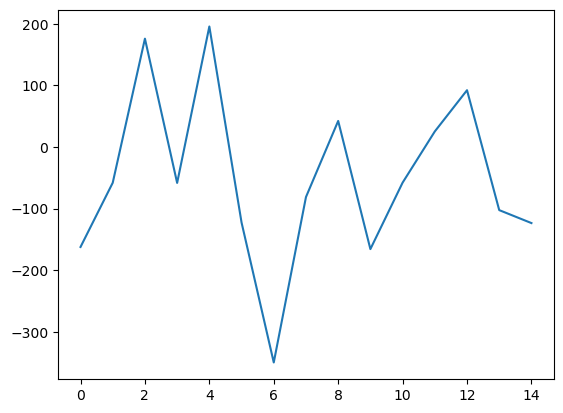

In [56]:
df_res.Error.plot()

# Box-Jenkins test to check model's goodness.

In [57]:
pvalue=sm.stats.acorr_ljungbox(r2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail to reject H0.Good model")

Reject H0. Bad model


# Plot actual vs. predicted values.

Text(0.5, 1.0, 'ARIMA model. Order =(0,2,1)')

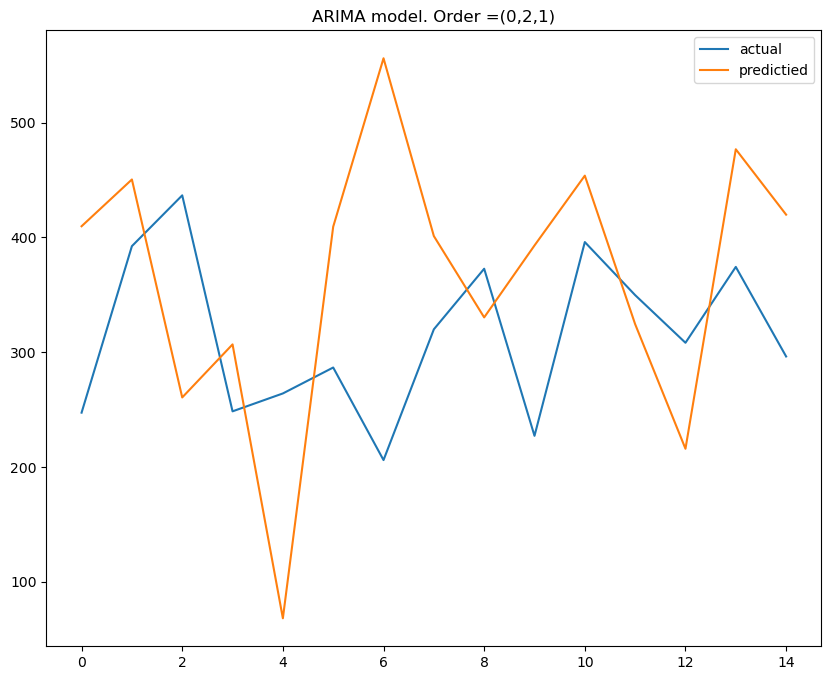

In [58]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predictied.plot(legend=True)
plt.title(msg)

# 3. Forecast using the model.

In [62]:
forecast1=r2.predict(start=len(resample_data),end=len(resample_data)+12,typ='levels')
forecast1.head()

2018-01-31    308.382490
2018-02-28      2.654608
2018-03-31     69.707933
2018-04-30    108.026814
2018-05-31    277.346649
Freq: M, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'ARIMA model. Order =(0,2,1)')

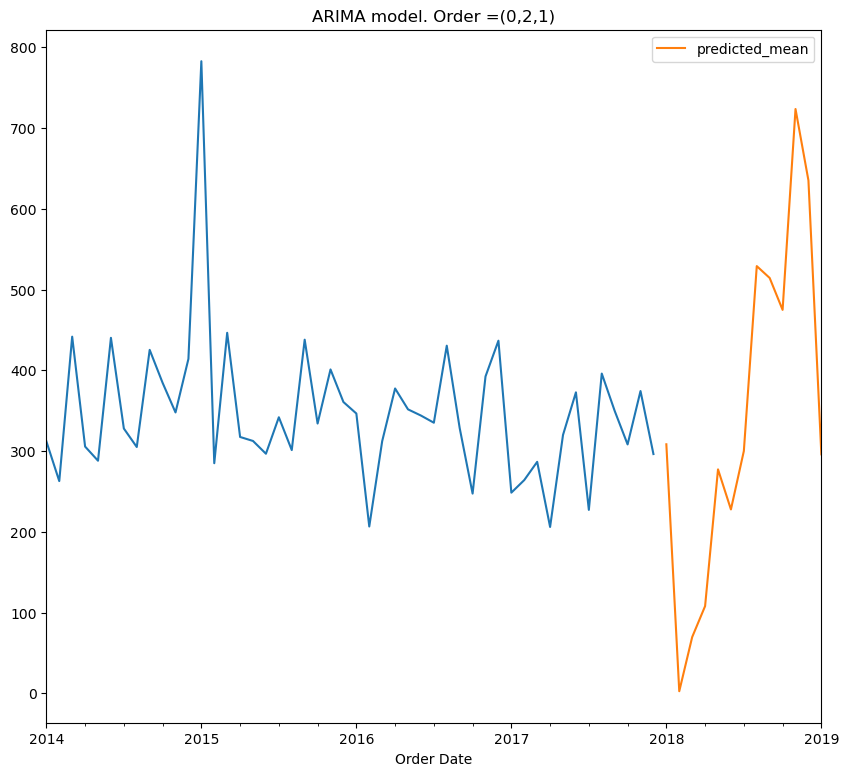

In [63]:
resample_data.plot(figsize=(10,9))
forecast1.plot(legend=True)
plt.title(msg)

# 4.Write your observation about the two models you have bulit during this challange.

There is no increase and decreaase forecast in the ARIMA Model but in the SARIMA Model there is incerase forecast trend.